# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [17]:
%matplotlib inline
# import numpy and pandas
import numpy, pandas
from scipy.stats import ttest_1samp, f_oneway, stats
import statsmodels.api as sm
import matplotlib.pyplot as plt


# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [2]:
# Run this code:
fifa = pandas.read_csv('fifa.csv')
len(fifa.Name)

18207

Let's examine the dataset by looking at the `head`.

In [3]:
# Your code here:
fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0


Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [4]:
# Your code here:
# Se requiere una funcion que tenga 1 columna de parametro y elimine el simbolo de Euro, el simbolo de "M" O "K" 
# y de acuerdo a la letra calcular el valor del jugador en M(Millones) y K(Killones...tú sabes...)

def fifa_cleaner(columna):
    lista = []
    for x in columna:
        temp = x[1:] # Elimina el simbolo de Euro en el dataframe
        if temp.endswith('M'): # Si termina en 'M' simboliza 'Millones' por lo que se multiplica x1000000
            int_temp = float(temp[:-1]) # Primero eliminamos el simbolo y luego se trasnforma en valor numerico float
            lista.append(int_temp*1000000)
        elif temp.endswith('K'): # Si termina en 'K' simboliza 'Kilos'(bromi, miles) por lo que se multiplica x1000
            int_temp1 = float(temp[:-1])
            lista.append(int_temp1*1000)
        elif temp:
            int_temp2 = float(temp) # No se porque no salía con un "else" pero se puede intentar, funciono bien con elif.
            lista.append(int_temp2) # Si no se pone, omite a los jugadores que no ganan en M o K :'( 
            
    return lista

fifa['ValueNumeric'] = fifa_cleaner(fifa['Value'])
fifa

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,...,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,ValueNumeric
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,...,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,110500000.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,...,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,77000000.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,...,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,118500000.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,...,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,72000000.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,...,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,102000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,19,England,47,65,Crewe Alexandra,€60K,Right,CM,2.0,...,57.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,60000.0
18203,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,€60K,Right,ST,2.0,...,39.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,60000.0
18204,B. Worman,16,England,47,67,Cambridge United,€60K,Right,ST,3.0,...,69.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,60000.0
18205,D. Walker-Rice,17,England,47,66,Tranmere Rovers,€60K,Right,RW,3.0,...,60.0,40.0,48.0,34.0,33.0,22.0,44.0,47.0,50.0,60000.0


#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [5]:
# Your code here:
diestros = fifa[(fifa['Preferred Foot'] == 'Right') & fifa['Position']]['ValueNumeric']
siniestros = fifa[(fifa['Preferred Foot'] == 'Left') & fifa['Position']]['ValueNumeric']


stats.f_oneway(diestros,siniestros)
diestros

1         77000000.0
2        118500000.0
3         72000000.0
4        102000000.0
5         93000000.0
            ...     
18202        60000.0
18203        60000.0
18204        60000.0
18205        60000.0
18206        60000.0
Name: ValueNumeric, Length: 13938, dtype: float64

What is your conclusion from this ANOVA?

In [6]:
# Your conclusions here:
#Concluyo que no soy experto en ANOVAS pero el de F_oneway ya me la pela. Y rechazamos H0 porque no es relevante el precio de un
#jugador por el pie preferido, por otro lado la posición en la que juega si influye mucho mas en su relación.

After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [7]:
# Your code here:
nacionalidades = fifa.Nationality.unique()
Top20 = fifa.groupby('Nationality').count().sort_values(by='Name', ascending=False).head(20)['Name']
Top20

Nationality
England                1662
Germany                1198
Spain                  1072
Argentina               937
France                  914
Brazil                  827
Italy                   702
Colombia                618
Japan                   478
Netherlands             453
Sweden                  397
China PR                392
Chile                   391
Republic of Ireland     368
Mexico                  366
United States           353
Poland                  350
Norway                  341
Saudi Arabia            340
Denmark                 336
Name: Name, dtype: int64

In [8]:
England = fifa[fifa.Nationality == 'England']['ValueNumeric']
Germany = fifa[fifa.Nationality == 'Germany']['ValueNumeric']
Spain = fifa[fifa.Nationality == 'Spain']['ValueNumeric']
Argentina = fifa[fifa.Nationality == 'Argentina']['ValueNumeric']
France = fifa[fifa.Nationality == 'France']['ValueNumeric']
Brazil = fifa[fifa.Nationality == 'Brazil']['ValueNumeric']
Italy = fifa[fifa.Nationality == 'Italy']['ValueNumeric']
Colombia = fifa[fifa.Nationality == 'Colombia']['ValueNumeric']
Japan = fifa[fifa.Nationality == 'Japan']['ValueNumeric']
Netherlands = fifa[fifa.Nationality == 'Netherlands']['ValueNumeric']
Sweden = fifa[fifa.Nationality == 'Sweden']['ValueNumeric']
ChinaPR = fifa[fifa.Nationality == 'China PR']['ValueNumeric']
Chile = fifa[fifa.Nationality == 'Chile']['ValueNumeric']
Ireland = fifa[fifa.Nationality == 'Republic of Ireland']['ValueNumeric']
Mexico = fifa[fifa.Nationality == 'Mexico']['ValueNumeric']
USA = fifa[fifa.Nationality == 'United States']['ValueNumeric']
Poland = fifa[fifa.Nationality == 'Poland']['ValueNumeric']
Norway = fifa[fifa.Nationality == 'Norway']['ValueNumeric']
ArabiaMaldita = fifa[fifa.Nationality == 'Saudi Arabia']['ValueNumeric']
Denmark = fifa[fifa.Nationality == 'Denmark']['ValueNumeric']

In [9]:
stats.f_oneway(England,Germany,Spain,Argentina,France,Brazil,Italy,Colombia,Japan,Netherlands,Sweden,ChinaPR,Chile,Ireland,Mexico,USA,Poland,Norway,ArabiaMaldita,Denmark)

F_onewayResult(statistic=35.90052255136794, pvalue=1.145324915818815e-128)

What is your conclusion from this ANOVA?

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [10]:
# Your code here:
fifa_drop = fifa.dropna()
fifa_drop

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,...,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,ValueNumeric
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,...,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,110500000.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,...,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,77000000.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,...,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,118500000.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,...,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,72000000.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,...,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,102000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,19,England,47,65,Crewe Alexandra,€60K,Right,CM,2.0,...,57.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,60000.0
18203,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,€60K,Right,ST,2.0,...,39.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,60000.0
18204,B. Worman,16,England,47,67,Cambridge United,€60K,Right,ST,3.0,...,69.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,60000.0
18205,D. Walker-Rice,17,England,47,66,Tranmere Rovers,€60K,Right,RW,3.0,...,60.0,40.0,48.0,34.0,33.0,22.0,44.0,47.0,50.0,60000.0


Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [11]:
# Your code here:
x = sm.add_constant(list(fifa_drop.SprintSpeed))
y = fifa_drop.Stamina

modelo = sm.OLS(y,x).fit()
prediccion = modelo.predict(x)
sumario = modelo.summary()
sumario

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Stamina   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                 1.115e+04
Date:                Tue, 07 Jan 2020   Prob (F-statistic):               0.00
Time:                        15:40:54   Log-Likelihood:                -70647.
No. Observations:               17918   AIC:                         1.413e+05
Df Residuals:                   17916   BIC:                         1.413e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.7632      0.422     46.857      0.000      18.936      20.590
x1             0.6712      0.006    105.610      0.000       0.659       0.684
==============================================================================
Omnibus:                       24.424   Durbin-Watson:                   1.777
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.491
Skew:                          -0.090   Prob(JB):                     4.81e-06
Kurtosis:                       3.008   Cond. No.                         300.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [19]:
#  Your conclusions here:
# No lo se Rick...tiene numeros muy altos, tengo que interpretar que si es relevante, se me ocurre que averiguar la formula para 
# obtener el valor de un jugador, para alimentar mejor la información y tener mejores referencias de la relación.


Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [18]:
# Your code here:

x = sm.add_constant(list(fifa_drop.Potential))
y = fifa_drop.SprintSpeed

modelo1 = sm.OLS(y,x).fit()
prediccion = modelo1.predict(x)
sumario1 = modelo1.summary()
sumario1

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            SprintSpeed   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     1075.
Date:                Tue, 07 Jan 2020   Prob (F-statistic):          4.71e-229
Time:                        15:57:50   Log-Likelihood:                -73021.
No. Observations:               17918   AIC:                         1.460e+05
Df Residuals:                   17916   BIC:                         1.461e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.2090      1.240     19.522      0.000      21.778      26.640
x1             0.5680      0.017     32.789      0.000       0.534       0.602
==============================================================================
Omnibus:                     1648.005   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2144.250
Skew:                          -0.807   Prob(JB):                         0.00
Kurtosis:                       3.517   Cond. No.                         834.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [14]:
# Your conclusions here:



Plot a scatter plot of value vs. potential. Do you see a linear relationship?

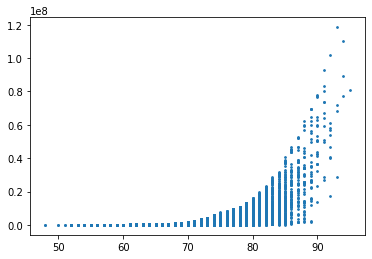

In [20]:
# Your code here:
plt.scatter(fifa['Potential'], fifa['ValueNumeric'], s=3)


In [ ]:
#Viste esa grafica papaw? una chulada...
# ve como el potencial esta ligadísisisimo al precio del jugador. Su pinshimare comare.